In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.291249,0.753601,-1.199823e-06,0.197347,0.667162,-0.000774,0.158234,0.561873,0.003109,0.159154,...,0.368162,0.427427,-0.035341,0.349841,0.501776,-0.011249,0.366398,0.533444,0.012331,a
1,0.287370,0.764013,-1.102440e-06,0.185446,0.683448,-0.012077,0.129450,0.583593,-0.017201,0.112969,...,0.363649,0.435136,-0.047672,0.347750,0.506825,-0.024700,0.364508,0.538110,-0.001062,a
2,0.376152,0.737019,-1.246073e-06,0.275043,0.680199,-0.004283,0.223710,0.594238,-0.000382,0.222771,...,0.428876,0.423865,-0.033916,0.417525,0.502829,-0.007737,0.436032,0.525462,0.018585,a
3,0.414516,0.725877,-1.146901e-06,0.312159,0.678229,-0.009438,0.258514,0.592765,-0.002202,0.258284,...,0.461880,0.434330,-0.014309,0.450934,0.512828,0.009343,0.467721,0.533720,0.034389,a
4,0.445902,0.714473,-1.141602e-06,0.345685,0.671863,-0.009457,0.288171,0.590946,-0.003752,0.280967,...,0.489803,0.427921,-0.016875,0.479300,0.505133,0.005902,0.494594,0.526761,0.030283,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,0.672353,0.861995,-8.455181e-07,0.589121,0.826429,-0.012700,0.528956,0.727910,-0.010490,0.491565,...,0.696022,0.568923,-0.016949,0.689997,0.518398,-0.016090,0.683125,0.463814,-0.007666,y
2282,0.671961,0.863356,-8.765766e-07,0.586724,0.825530,-0.009249,0.528883,0.730290,-0.006241,0.493983,...,0.700199,0.573712,-0.016410,0.693793,0.531219,-0.014553,0.683553,0.486963,-0.005850,y
2283,0.668045,0.860588,-9.263883e-07,0.586141,0.824381,-0.012980,0.531836,0.733226,-0.012113,0.497882,...,0.703237,0.572817,-0.022281,0.696747,0.550662,-0.019744,0.687077,0.535910,-0.010189,y
2284,0.669783,0.864938,-9.831039e-07,0.586463,0.830819,-0.009944,0.529088,0.740818,-0.007836,0.496934,...,0.705235,0.573389,-0.029729,0.700466,0.555114,-0.026900,0.693855,0.545230,-0.017185,y


In [4]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.291249,0.753601,-1.199823e-06,0.197347,0.667162,-0.000774,0.158234,0.561873,0.003109,0.159154,...,0.368162,0.427427,-0.035341,0.349841,0.501776,-0.011249,0.366398,0.533444,0.012331,a
1,0.287370,0.764013,-1.102440e-06,0.185446,0.683448,-0.012077,0.129450,0.583593,-0.017201,0.112969,...,0.363649,0.435136,-0.047672,0.347750,0.506825,-0.024700,0.364508,0.538110,-0.001062,a
2,0.376152,0.737019,-1.246073e-06,0.275043,0.680199,-0.004283,0.223710,0.594238,-0.000382,0.222771,...,0.428876,0.423865,-0.033916,0.417525,0.502829,-0.007737,0.436032,0.525462,0.018585,a
3,0.414516,0.725877,-1.146901e-06,0.312159,0.678229,-0.009438,0.258514,0.592765,-0.002202,0.258284,...,0.461880,0.434330,-0.014309,0.450934,0.512828,0.009343,0.467721,0.533720,0.034389,a
4,0.445902,0.714473,-1.141602e-06,0.345685,0.671863,-0.009457,0.288171,0.590946,-0.003752,0.280967,...,0.489803,0.427921,-0.016875,0.479300,0.505133,0.005902,0.494594,0.526761,0.030283,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,0.672353,0.861995,-8.455181e-07,0.589121,0.826429,-0.012700,0.528956,0.727910,-0.010490,0.491565,...,0.696022,0.568923,-0.016949,0.689997,0.518398,-0.016090,0.683125,0.463814,-0.007666,y
2282,0.671961,0.863356,-8.765766e-07,0.586724,0.825530,-0.009249,0.528883,0.730290,-0.006241,0.493983,...,0.700199,0.573712,-0.016410,0.693793,0.531219,-0.014553,0.683553,0.486963,-0.005850,y
2283,0.668045,0.860588,-9.263883e-07,0.586141,0.824381,-0.012980,0.531836,0.733226,-0.012113,0.497882,...,0.703237,0.572817,-0.022281,0.696747,0.550662,-0.019744,0.687077,0.535910,-0.010189,y
2284,0.669783,0.864938,-9.831039e-07,0.586463,0.830819,-0.009944,0.529088,0.740818,-0.007836,0.496934,...,0.705235,0.573389,-0.029729,0.700466,0.555114,-0.026900,0.693855,0.545230,-0.017185,y


In [5]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (2286, 63)
Labels shape = (2286,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [7]:
y_pred = svm.predict(x_test)
y_pred

array(['q', 'l', 'i', 'p', 'a', 'l', 'o', 'f', 'l', 'o', 'u', 'm', 'd',
       'k', 's', 'r', 'c', 'd', 'a', 'p', 'b', 'u', 'v', 'k', 'i', 'i',
       't', 'l', 'y', 'r', 'y', 's', 't', 'x', 'e', 'n', 'b', 'r', 'w',
       'i', 'e', 'h', 'f', 'h', 'g', 'i', 'y', 'k', 'k', 'v', 'o', 'f',
       's', 'f', 'r', 'g', 'r', 'b', 'm', 'w', 'a', 's', 'b', 'i', 't',
       'x', 'r', 'f', 'y', 'r', 'x', 'k', 'g', 'm', 'f', 'n', 'l', 'v',
       'n', 's', 'o', 'l', 'g', 'r', 'e', 'n', 'w', 'u', 'x', 'a', 's',
       'r', 'c', 'r', 'u', 'p', 'b', 'f', 'g', 'c', 'p', 'q', 'v', 's',
       'd', 'o', 'o', 'k', 'm', 'v', 'm', 'h', 'm', 'p', 'a', 'm', 'w',
       'f', 'c', 'r', 'u', 'b', 'c', 'o', 'o', 'w', 'g', 'l', 'f', 'e',
       'e', 'u', 'c', 't', 'r', 'e', 'b', 'l', 'b', 'r', 'y', 'o', 'i',
       'e', 'y', 'q', 'u', 'x', 'r', 'r', 'u', 's', 'x', 'b', 'g', 'e',
       'a', 'f', 's', 'b', 'h', 'i', 'h', 'p', 'n', 'u', 'f', 'w', 's',
       'n', 'l', 'u', 'd', 'g', 'm', 'p', 'e', 't', 'y', 'p', 'a

In [8]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9956331877729258, 0.9956331877729258, 0.9956331877729258)

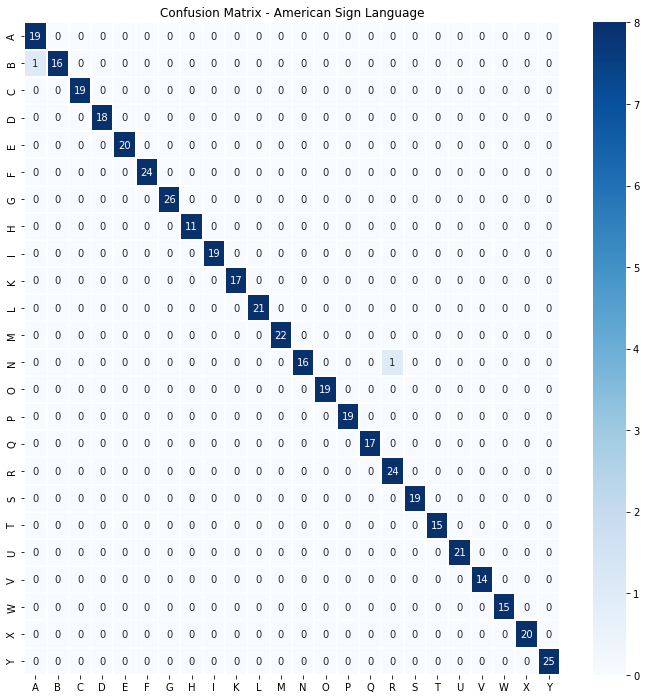

In [9]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)